In [2]:
!pip install tensorflow
!pip install gym

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# import gym
# import numpy as np
# import random
# from tensorflow import keras
# from keras.models import Sequential
# from keras.layers import Dense, Flatten
# from keras.optimizers import Adam

In [4]:
# env = gym.make("CartPole-v1", render_mode="human")
# noOfStates = env.observation_space.shape[0]
# noOfActions = env.action_space.n

In [5]:
import matplotlib.pyplot as plt
import gymnasium as gym
from gymnasium import spaces
from google.colab import widgets
import numpy as np
import time

class GridEnvironment(gym.Env):
    metadata = { 'render.modes': [] }
    
    def __init__(self,env="Deterministic", max_timesteps=100):

        self.observation_space = spaces.Discrete(25)
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = max_timesteps
        self.env = env
        self.timestep = 0
        self.agent_pos = [0, 0]
        self.goal_pos = [4, 4]
        self.reward1_pos = [1,4]
        self.reward2_pos = [2,3]
        self.reward3_pos = [3,1]
        self.reward4_pos = [1,1]
        self.state = np.zeros((5,5))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        self.state[tuple(self.reward1_pos)] = 0.1
        self.state[tuple(self.reward2_pos)] = 0.3
        self.state[tuple(self.reward3_pos)] = 0.8
        self.state[tuple(self.reward4_pos)] = 0.7

        
    def reset(self, **kwargs):
        self.agent_pos = [0, 0]
        self.state = np.zeros((5,5))
        self.goal_pos = [4, 4]
        self.reward1_pos = [1,4]
        self.reward2_pos = [2,3]
        self.reward3_pos = [3,1]
        self.reward4_pos = [1,1]
        self.timestep=0
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        self.state[tuple(self.reward1_pos)] = 0.1
        self.state[tuple(self.reward2_pos)] = 0.3
        self.state[tuple(self.reward3_pos)] = 0.8
        self.state[tuple(self.reward4_pos)] = 0.7
        observation = self.state.flatten()

        info = {}

        return observation
    
    def step(self, action):
        if self.env=="Stochastic":
          l=[0,1,2,3]
          action = np.random.choice([action] + list(filter(lambda a: a!=action, l)),p=[0.4,0.2,0.2,0.2])

        if action == 0:
          self.agent_pos[0] += 1
        if action == 1:
          self.agent_pos[0] -= 1
        if action == 2:
          self.agent_pos[1] += 1
        if action == 3:
          self.agent_pos[1] -= 1

        self.agent_pos = np.clip(self.agent_pos, 0, 4)

        self.state = np.zeros((5,5))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        self.state[tuple(self.reward1_pos)] = 0.1
        self.state[tuple(self.reward2_pos)] = 0.3
        self.state[tuple(self.reward3_pos)] = 0.8
        self.state[tuple(self.reward4_pos)] = 0.7
        
        reward = 0
        if np.array_equal(self.agent_pos, self.goal_pos):
          self.state[tuple(self.goal_pos)] = 1
          reward = 4
        
        if np.array_equal(self.agent_pos, self.reward1_pos):
          self.state[tuple(self.reward1_pos)] = 1
          reward = -2


        if np.array_equal(self.agent_pos, self.reward2_pos):
          self.state[tuple(self.reward2_pos)] = 1
          reward = -3


        if np.array_equal(self.agent_pos, self.reward3_pos):
          self.state[tuple(self.reward3_pos)] = 1
          reward = -1


        if np.array_equal(self.agent_pos, self.reward4_pos):
          self.state[tuple(self.reward4_pos)] = 1
          reward = -2.5
        
        observation = self.state.flatten()


        
        self.timestep += 1

        terminated = True if self.timestep >= self.max_timesteps or np.array_equal(self.agent_pos,self.goal_pos) else False
        truncated = True if np.all((self.agent_pos >=0 ) & (self.agent_pos <= 11)) else False

        info = {}

        
        return observation, reward, terminated, info
        
    def render(self):
        plt.imshow(self.state)


In [6]:

#@title Replay Memory Class
class ReplayMemory:
  def __init__(self,size):
    self.size = size
    self._memory = []
  
  def add(self,value):
    if len(self._memory) > 1000:
      self._memory.pop(0) # Removing the outdated memory info
    self._memory.append(value)
  
  def length(self):
    return len(self._memory)
  
  def getAll(self):
    # A Shallow copy is enough for this
    # As all values here will be stored as tuples
    return self._memory[::]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
# #@title Neural Network Model
# def buildModel(noOfStates, noOfActions, learningRate):
#   model = Sequential([
#       Flatten(input_shape=(noOfStates)),
#       Dense(units = 24, activation = "relu"),
#       Dense(units = 24, activation = "relu"),
#       Dense(units = noOfActions, activation = "linear")
#   ])

#   model.compile(optimizer=Adam(learningRate = learningRate), loss="")

#   return model

In [8]:
# #@title Hyper Parameters

# maxEpsilon = 1
# minEpsilon = 0.01
# replayMemorySize = 1000
# batchSize = 16
# learningRate = 1e-4
# noOfEpisodes = 2000
# epsilonDecay = (minEpsilon/maxEpsilon)**(1/noOfEpisodes)
# epsilon = maxEpsilon

## DQN Algorithm
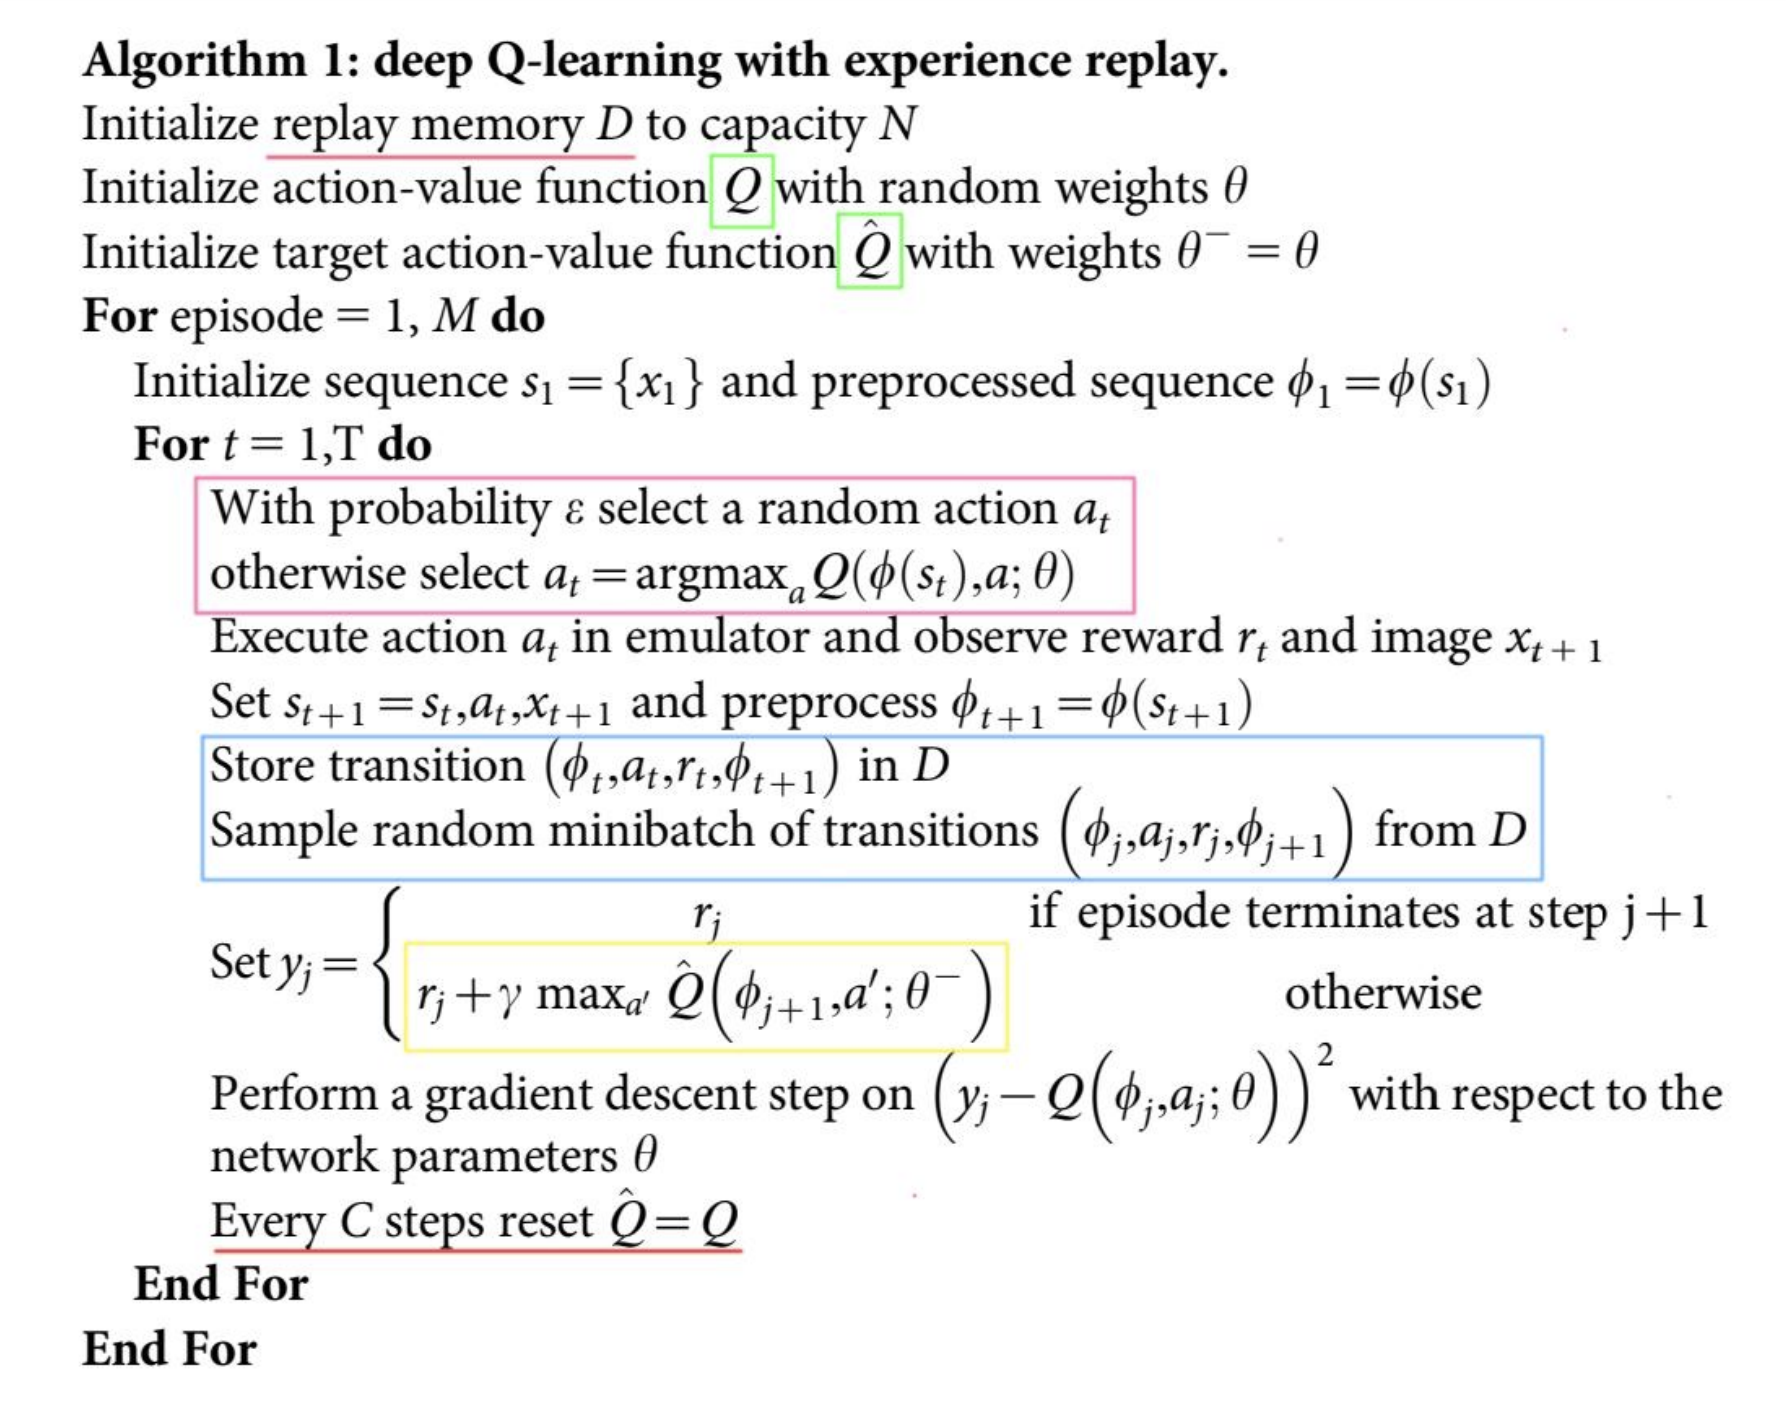

In [9]:
# #@title Algorithm Implementation
# # 1. Initialized Replay Memory
# replayMemory = ReplayMemory(replayMemorySize)
# # 2. Action value function with random weights
# trainingQFunction = buildModel(noOfStates, noOfActions, learningRate)
# # 3. Target Action Value function with the copy of the weights 
# targetQFunction = buildModel(noOfStates, noOfActions, learningRate)
# weights_theta = trainingQFunction.get_weights()
# targetQFunction.set_weights(weights_theta) 

# # 4. Outer For loop for episodes
# for episode in range(noOfEpisodes):
#   done = False
#   # 5.Initialized Sequence and preprocessed into numpy array
#   obs = np.array(env.reset())
#   total_rewards = 0

#   # 6. Inner loop for steps
#   while not done:
#     # 7. Exploration and Exploitation
#     randValue = np.random.rand()
#     action = None
#     if randValue < epsilon:
#       action = env.action_space.sample()
#     else :
#       action = np.argmax(trainingQFunction.predict(obs)[0])
#     action = np.array(action)
#     # 8. Executing action
#     nextObs, reward, done, info = env.step(action)
#     # 9. Preprocess observation
#     nextObs = np.array(nextObs)
#     total_rewards+= reward
#     # 10. Saving the value in memory
#     replayMemory.add((obs,action,reward,nextObs))
#     # 11. Sampling Random Minibatch
#     # We can modify this condition by changing threshold(batchSize) to higher
#     # value, so that the minibatch from the replay memory can be sampled
#     # from a larger pool of values
#     if replayMemory.length() > batchSize:
#       minibatch = np.array(random.sample(replayMemory.getAll(),batchSize))
      





#   epsilon *= epislonDecay



()
25


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 23ms/step
1/1 - 0s - loss: 7.7656e-04 - 5ms/epoch - 5ms/step
1/1 [==============================] - 0s 24ms/step
1/1 - 0s - loss: 5.5767e-05 - 6ms/epoch - 6ms/step
1/1 [==============================] - 0s 43ms/step
1/1 - 0s - loss: 5.3009e-05 - 11ms/epoch - 11ms/step
1/1 [==============================] - 0s 34ms/step
1/1 - 0s - loss: 5.0399e-05 - 7ms/epoch - 7ms/step
1/1 [==============================] - 0s 34ms/step
1/1 - 0s - loss: 0.0010 - 6ms/epoch - 6ms/step
1/1 [==============================] - 0s 41ms/step
1/1 - 0s - loss: 0.0033 - 7ms/epoch - 7ms/step
1/1 [==============================] - 0s 36ms/step
1/1 - 0s - loss: 7.3293e-05 - 7ms/epoch - 7ms/step
1/1 [==============================] - 0s 34ms/step
1/1 - 0s - loss: 6.9566e-05 - 8ms/epoch - 8ms/step
1/1 [==============================] - 0s 34ms/step
1/1 - 0s - loss: 3.2712e-05 - 7ms/epoch - 7ms/step
1/1 [=======================

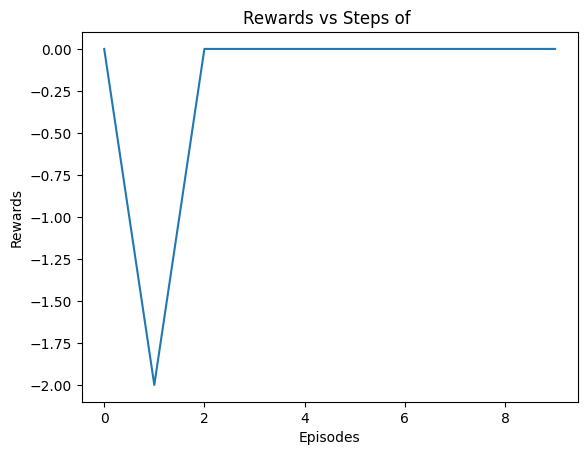

In [10]:
# @title Revised DQN Implementation
import gym
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

from collections import deque,namedtuple

Hyperparameters = namedtuple('Hyperparameters',[
    'memory_size'    ,
    'epsilon'        ,
    'epsilon_min'    ,
    'epsilon_decay'  ,
    'learning_rate'  ,
    'discount_factor',
    'batch_size'     ,
    'noOfEpisodes'   ,
    'stepsPerEpisode',
    'updateInterval' ,
    'rewardThreshold'
])

class DeepQNetwork:
    def __init__(self, env, hyperparams):
        self.env = env
        self.replayMemory = deque(maxlen=hyperparams.memory_size)
        self.epsilon = hyperparams.epsilon
        self.epsilon_min = hyperparams.epsilon_min
        self.noOfEpisodes = hyperparams.noOfEpisodes
        self.stepsPerEpisode = hyperparams.stepsPerEpisode
        self.updateInterval = hyperparams.updateInterval
        self.rewardThreshold = hyperparams.rewardThreshold
        self.epsilon_decay = (self.epsilon_min / self.epsilon) ** (1 / self.noOfEpisodes)
        self.learning_rate = hyperparams.learning_rate
        self.discount_factor = hyperparams.discount_factor
        self.batch_size = hyperparams.batch_size
        self.qNetwork = self.create_model()
        self.targetNetwork = self.create_model()
        self.syncWeights()

    def create_model(self):
        state_shape = self.env.observation_space.n
        actions = self.env.action_space.n
        print(state_shape)

        model = Sequential([
            Dense(24, input_dim=(state_shape), activation="relu"),
            Dense(48, activation="relu"),
            Dense(24, activation="relu"),
            Dense(actions, activation="linear")
        ])
        model.compile(
            loss="mean_squared_error",
            optimizer=SGD(lr=self.learning_rate)
        )
        return model

    def syncWeights(self):
        weights = self.qNetwork.get_weights()
        self.targetNetwork.set_weights(weights)

    def getNextAction(self, state):
        epsilon = self.epsilon
        nextAction = None
        if np.random.random() < epsilon:
            nextAction = self.env.action_space.sample()
        nextAction = np.argmax(self.qNetwork.predict(state)[0])
        return nextAction

    def addToMemory(self, state, action, reward, nextState, done):
        self.replayMemory.append([state, action, reward, nextState, done])

    def predictValue(self):

        if len(self.replayMemory) < self.batch_size:
            return

        samples = random.sample(self.replayMemory, self.batch_size)
        for sample in samples:
            state, action, reward, nextState, done = sample
            target = self.targetNetwork.predict(state)
            if done:
                target[0][action] = reward
            else:
                nextQValue = max(self.targetNetwork.predict(nextState)[0])
                target[0][action] = reward + nextQValue * self.discount_factor
            self.qNetwork.fit(state, target, epochs=1, verbose=2)
    
    def train(self):
      env = self.env
      rewards = []
      noOfStates = env.observation_space.n
      print("-"*80)
      for episode in range(self.noOfEpisodes):
        epsilon = self.epsilon
        print("Training Episode : ",episode)
        print("-"*80)
        state = env.reset()
        print(len(state))
        state = np.array(state)
        state = state.reshape(1,noOfStates)

        totalReward = 0
        for timestep in range(self.stepsPerEpisode):
          action = self.getNextAction(state)
          nextState, reward, done, info = env.step(action)
          nextState = nextState.reshape(1, noOfStates)
          self.addToMemory(state, action, reward, nextState,done)
          self.predictValue()
          totalReward += reward
          if timestep % self.updateInterval == 0:
            self.syncWeights()
          
          if done or totalReward > self.rewardThreshold:
            break
        epsilon *= self.epsilon_decay
        self.epsilon = max(self.epsilon_min, epsilon)
        print("-"*80)
        print(f'{episode=},{totalReward=}')
        print("-"*80)
        rewards.append(totalReward)
      # env.close()
      # Plot 1 : Episode vs Rewards
      plt.title(f'Rewards vs Steps of ')
      plt.plot(list(range(self.noOfEpisodes)),rewards)
      plt.xlabel("Episodes")
      plt.ylabel("Rewards")
      plt.savefig(f'./RewardsVsEpisodes_.png')
      plt.show()

env = GridEnvironment(env="Deterministic")
print(env.observation_space.shape)

hyperparams = Hyperparameters(
    memory_size       = 500,
    epsilon           = 1,
    epsilon_min       = 0.01,
    epsilon_decay     = 0.999,
    learning_rate     = 0.01,
    discount_factor   = 0.9,
    batch_size        = 16,
    noOfEpisodes      = 10,
    stepsPerEpisode   = 15,
    updateInterval    = 5,
    rewardThreshold   = 30
)

dqn = DeepQNetwork(env, hyperparams)

dqn.train()

